# Genenral scan

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 

# PMNS matrix 2018 to $3\sigma$ https://arxiv.org/abs/1708.01186

In [3]:
import NEUTRINO2018
import neutrino_analytic3

In [4]:
#Concatenar files desde Jupyter
'''
xd0 = pd.read_csv('general-scan.csv')
#File got with nohup
xdnew = pd.read_csv('xd_scan-general-6.csv')

xd = pd.concat([xd0, xdnew],ignore_index=True)
del xd['Unnamed: 0']

print(xd0.shape,xdnew.shape,xd.shape)

#save file
xd.to_csv('general-scan.csv')
'''

"\nxd0 = pd.read_csv('general-scan.csv')\n#File got with nohup\nxdnew = pd.read_csv('xd_scan-general-6.csv')\n\nxd = pd.concat([xd0, xdnew],ignore_index=True)\ndel xd['Unnamed: 0']\n\nprint(xd0.shape,xdnew.shape,xd.shape)\n\n#save file\nxd.to_csv('general-scan.csv')\n"

In [5]:
xd = pd.read_csv('general-scan.csv')
del xd['Unnamed: 0']

In [6]:
xd.shape

(3147, 59)

# Analytical diagonalization rutine for Neutrino mass matriz

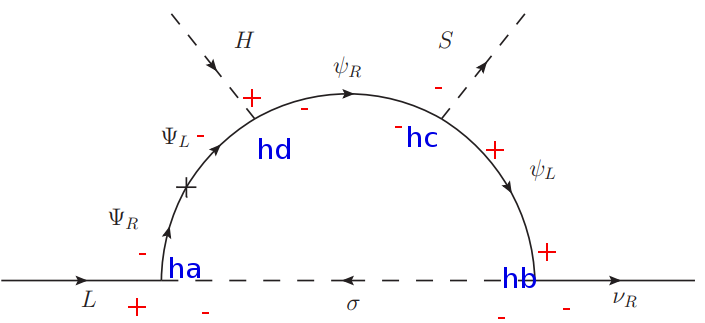

In [7]:
from IPython.display import Image
Image("/home/anferivera/Dropbox/SingletDoubletDirac/draft_SDdiracDM/figures/neutrino-GB.png", width=500)

TWO DIRAC FERMIONS IN THE LOOP:

\begin{align}
\mathcal{M}_{\alpha\beta}= \sum_{i=1}^2\sum_{k=1}^2
\dfrac{V_{k2}U_{k1}}{16\pi^2}
\times b_{\alpha i} a_{\beta i} m_{N_k} 
\times \left[\dfrac{m_{N_k}^2}{\left(m_{N_k}^2-m_{S_i}^2\right)}\ln{\left(\dfrac{m_{N_k}^2}{m_{S_i}^2}\right)}\right]\,.
\end{align}

Import the analytical rutine for compute the $\mathcal{M}_{\alpha\beta}$ version two

Example:

In [8]:
#Add to the DataFrame
xd['mn1'] = neutrino_analytic3.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,\
   xd.YRA11,xd.YRA12,xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[0]
xd['mn2'] = neutrino_analytic3.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,\
   xd.YRA11,xd.YRA12,xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[1]
xd['mn3'] = neutrino_analytic3.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,\
   xd.YRA11,xd.YRA12,xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[2]

In [9]:
##WARNING: The vev change in SPheno
xd[['mv1','mn1','mv2','mn2','mv3','mn3']][:3]

,mv1,mn1,mv2,mn2,mv3,mn3
0,7.752366e-20,0.000000e+00,8.436243e-12,8.436246e-12,5.070676e-11,5.070677e-11
1,3.546550e-19,0.000000e+00,8.953276e-12,8.953372e-12,5.014552e-11,5.014549e-11
2,3.669953e-19,4.336809e-19,8.950439e-12,8.950438e-12,4.981227e-11,4.981237e-11


# PLOTS

In [10]:
#good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

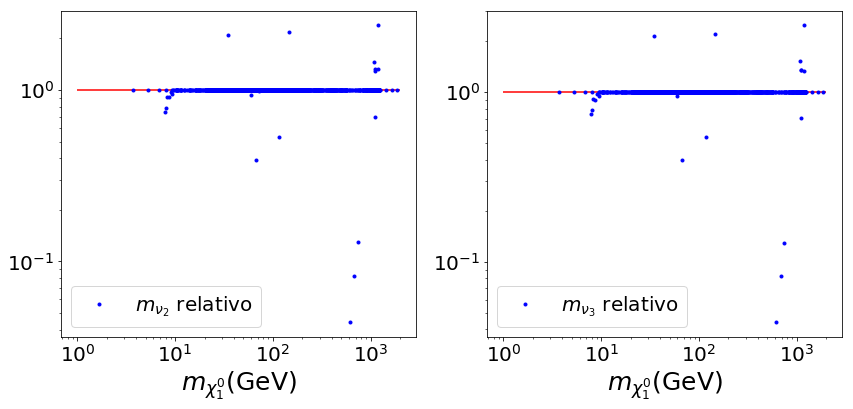

In [11]:
plt.figure(figsize=(14,6))

plt.subplot(121)
plt.loglog(xd.mChi1, xd.mv2/xd.mn2, 'b.',label=r'$m_{\nu_2}$ relativo')
plt.hlines(1,1,2000, color='red')
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.legend()

plt.subplot(122)
plt.loglog(xd.mChi1, xd.mv3/xd.mn3, 'b.',label=r'$m_{\nu_3}$ relativo')
plt.hlines(1,1,2000, color='red')
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.legend()

plt.show()

In [12]:
#Experimental values for DM: Latest Planck results 2018
### WARNING 
e = 10
Omega = 0.120
Omega_min=Omega - e*0.001
Omega_max=Omega + e*0.001
print( Omega_min, Omega,Omega_max)

0.11 0.12 0.13


DM cut

In [13]:
xDM = xd[np.logical_and(xd.Omega>Omega_min, xd.Omega < Omega_max)]
print(xd.shape[0], xDM.shape[0])

3147 2339


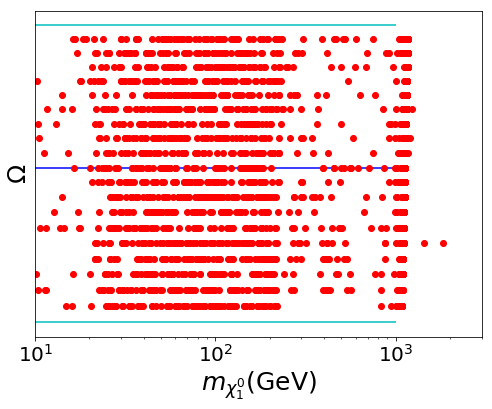

In [24]:
plt.figure(figsize=(8,6))

#plt.loglog(xd.mChi1,xd.Omega,'b.')
plt.loglog(xDM.mChi1,xDM.Omega,'ro')
plt.hlines(Omega_max,1,1e3, 'c',label=r'')
plt.hlines(Omega_min,1,1e3, 'c',label=r'')
plt.hlines(Omega,1,1e3, 'b',label=r'0.11')

#plt.legend(prop={'size':15},loc='best')
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\Omega$',size=25)
plt.xlim(10,3e3)
#plt.ylim(11.2e-2,1.3e-1)

plt.show()

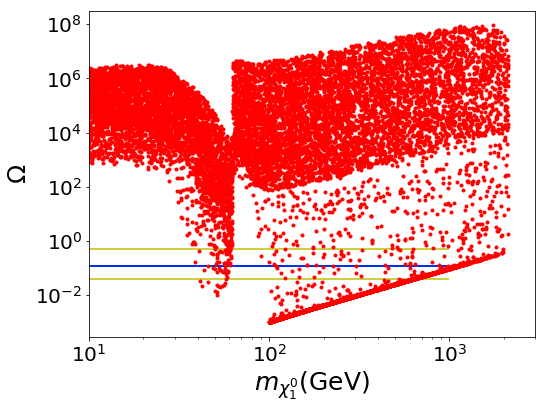

cuts

Maximun values: Some elements tend to be small

In [15]:
print(np.abs(xd.YRB11).max(),np.abs(xd.YRB12).max(),np.abs(xd.YRB13).max())
print(np.abs(xd.YRB21).max(),np.abs(xd.YRB22).max(),np.abs(xd.YRB23).max())

3.64748357987 23.6733562374 46.1946675303
2.40491403564 40.746865444 68.4753399216


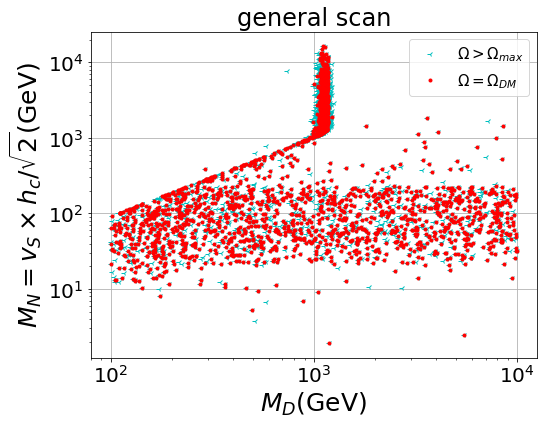

In [25]:
plt.figure(figsize=(8,6))

plt.loglog(xd.MDF, xd.vS*xd.YRC/np.sqrt(2),'c3',label=r'$\Omega > \Omega_{max}$')
plt.loglog(xDM.MDF, xDM.vS*xDM.YRC/np.sqrt(2),'r.',label=r'$\Omega =\Omega_{DM}$')
plt.grid()
plt.title('general scan')
plt.legend(prop={'size':15},loc='best')
plt.xlabel(r'$M_{D}$(GeV)',size=25)
plt.ylabel(r'$M_N=v_S \times h_c /\sqrt{2}$(GeV)',size=25)

#plt.ylim(5,2e3)

plt.show()

# Experimental Constrainsts after the relic density cut

In [26]:
from indirectdirect import *

# $\sigma_{SI}$ and Sigma v: $\langle\sigma v \rangle$

In [27]:
from scipy import interpolate

#Importar un txt
names1 = ['MDM', 'XENON1TSI']
xe = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_XENON1T/XENON1T-2018.txt')
xdxe = pd.DataFrame(xe, columns=names1)

XENON1T=interpolate.interp1d(xdxe.MDM,xdxe.XENON1TSI)

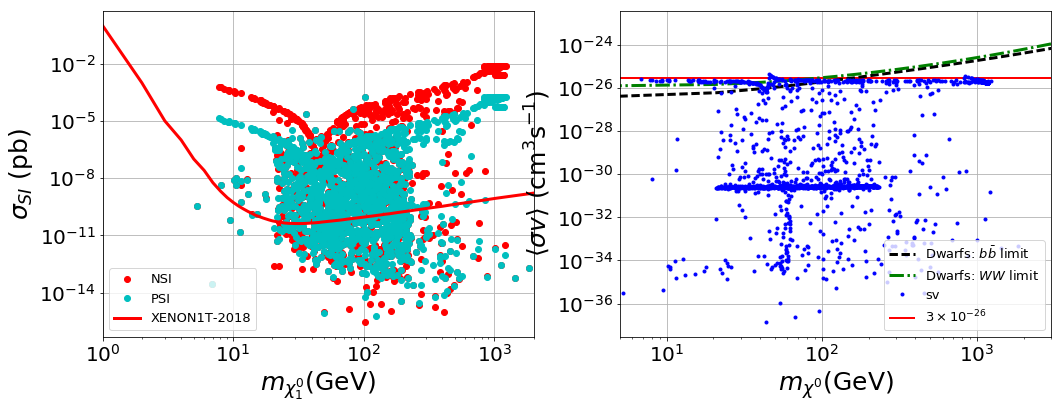

In [35]:
plt.figure(figsize=(17,6))

plt.subplot(121)
plt.loglog(xDM.mChi1, xDM.NSI, 'ro')
plt.plot(xDM.mChi1, xDM.PSI, 'co')
#plt.loglog(xd.mChi1, xd.PSI, 'c.')
#plt.loglog(xd.mChi1, xd.NSI, 'g.')
plt.legend()

n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T-2018')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI} $ (pb)',size=25)
plt.legend(prop={'size':13},loc='lower left')
plt.grid()
plt.xlim(1e0,2e3)

plt.subplot(122)
plt.hlines(3e-26,0.1,1e4,'r',lw=2,label=r'$3\times 10^{-26}$')
##Plot xx-->> bb --> tt
m=np.linspace(1,10000,500)
plt.semilogy(m,sigmav_bb_fit(m),'k--',lw=3,label=r'Dwarfs: $b\bar{b}$ limit')
plt.semilogy(m,sigmav_ww_fit(m),'g-.',lw=3,label=r'Dwarfs: $WW$ limit')

plt.loglog(xDM.mChi1, xDM.sv , 'b.')
#plt.loglog(xd.mChi1, xd.sv , 'b.')

plt.legend(prop={'size':13},loc='lower right')
plt.grid()

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\langle\sigma v\rangle $ $($cm$^{3} $s$^{-1})$',size=25)

#plt.ylim(1e-35,1e-24)
plt.xlim(5,3e3)
plt.show()

# Analytic expression: $\sigma_{SI}$

In [37]:
#Parameters
fN = 0.25
v = 244.874425
#nucleon mass in GeV (proton)
MNC = 938.27*1e-3
## GeV-2 to cm-2
#http://www.saha.ac.in/theory/palashbaran.pal/conv.html
GeVtomin2topb = (5.06*1e+13)**(-2)*1e+36

In [52]:
#Reset index to imput new data to the dataframe
xDM = xDM.reset_index()
del[xDM['index']]

In [53]:
#Add vertices to the dataframe
xDM['cxxh1'] = -(xDM.YRC*xDM.XV12*xDM.ZH12 + xDM.YRD*xDM.XV11*xDM.ZH11)*xDM.XU12/np.sqrt(2)
xDM['cxxh2'] = -(xDM.YRC*xDM.XV12*xDM.ZH22 + xDM.YRD*xDM.XV11*xDM.ZH21)*xDM.XU12/np.sqrt(2)

In [100]:
# Formula
#xDM['PSI_anal'] = ((MNC*xDM.mChi1/(MNC + xDM.mChi1))**2/np.pi)\
#*(MNC*fN/xDM.vevSM)**2*(xDM.cxxh1*xDM.ZH11/(xDM.mh1)**2 + xDM.cxxh2*xDM.ZH21/(xDM.mh2)**2)**2*GeVtomin2topb

xDM['PSI_anal'] = ((MNC*xDM.mChi1/(MNC + xDM.mChi1))**2)*(1./np.pi)\
*(MNC*fN/xDM.vevSM)**2*(xDM.cxxh1*xDM.ZH11/(xDM.mh1)**2 + xDM.cxxh2*xDM.ZH22/(xDM.mh2)**2)**2*GeVtomin2topb

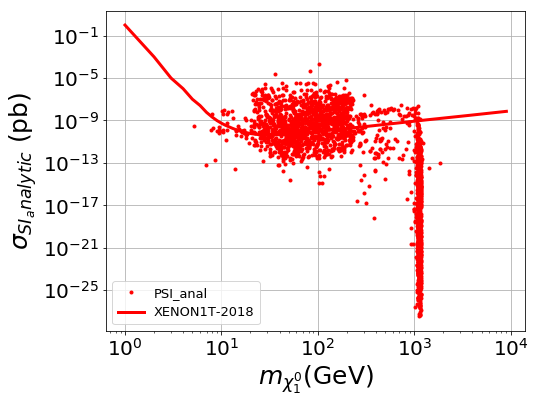

In [101]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.loglog(xDM.mChi1, xDM.PSI_anal, 'r.')

n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T-2018')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI_analytic} $ (pb)',size=25)
plt.legend(prop={'size':13},loc='lower left')
plt.grid()
#plt.ylim(1e-13,1e-4)

'''
plt.subplot(1,2,2)
plt.loglog(xDM.mChi1, xDM.PSI, 'c.')
n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T-2018')
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI_{micrOmegas}} $ (pb)',size=25)
plt.legend(prop={'size':13},loc='lower left')
plt.grid()
'''

plt.tight_layout()
#plt.savefig('plots/sigmaSI_P.pdf')

# $\sigma_{SD}$

In [49]:
from scipy import interpolate

#Importar un txt
namesLZSD = ['MDM', 'LZSD']
lz = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LZ/LZ_SD_neutrons_expectation.dat')
xdlz = pd.DataFrame(lz, columns=namesLZSD)
LZ=interpolate.interp1d(xdlz.MDM,xdlz.LZSD)

names = ['MDM', 'XENON1TSD']
xeSD=np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LZ/Xenon1T_SDneutrons_expectations.dat')
xdxeSD = pd.DataFrame(xeSD, columns=names)
XENON1TSD=interpolate.interp1d(xdxeSD.MDM,xdxeSD.XENON1TSD)

In [50]:
#IC WW SD DATA
ICc_sd = ['M', 'sigmaSD']
ICsd = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_IceCube/IceCubeWW.dat')
IC_SD = pd.DataFrame(ICsd, columns=ICc_sd)

# PICO-60 y PICO-2L
pico60columns = ['M','sigmaSD']
pico60datos = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_PICO/fig12-PICO-60.dat')
PICO60_SD = pd.DataFrame(pico60datos, columns=pico60columns)

#LUX SD protons and neutrons http://arxiv.org/pdf/1602.03489.pdf
LUX_sd = ['M', 'sigmaSD']
datosneutrons = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LUX/SD/LUX_SD_neutrons.dat')
LUX_SD_n = pd.DataFrame(datosneutrons, columns=LUX_sd)

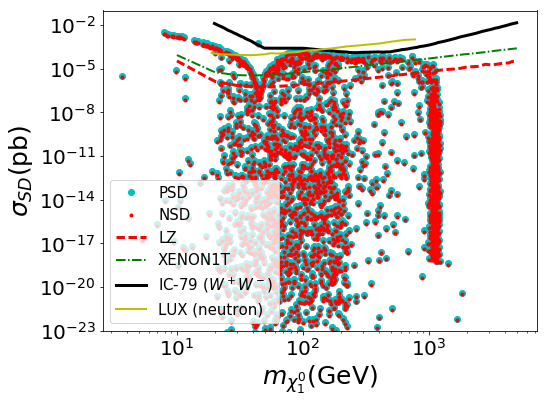

In [54]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mChi1,xd['PSD'],'co')
plt.loglog(xd.mChi1,xd['NSD'],'r.')

#Prospects
n=np.arange(10,5000,10)
plt.loglog(n,LZ(n),'r--',lw=3,label='LZ')
plt.loglog(n,XENON1TSD(n),'g-.',lw=2,label='XENON1T')

#plt.plot(PICO2L_SD['M'],PICO2L_SD['sigmaSD']*(1E+36),'lime',lw=2,label='PICO-2L (proton)')
#plt.plot(PICO60_SD['M'],PICO60_SD['sigmaSD']*(1e+36),'y-',lw=2,label='PICO-60 (proton)')
#IceCube limit
plt.plot(10**IC_SD['M'],10**IC_SD['sigmaSD']*1e+36,'k-',lw=3,label=r'IC-79 ($W^+W^-$)')
#LUX
plt.plot(LUX_SD_n['M'],LUX_SD_n['sigmaSD']*(1e+36),'y',lw=2,label='LUX (neutron)')

#plt.title(r'Preliminary: Without LFV')
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SD}$(pb)',size=25)
plt.legend(prop={'size':15},loc='lower left')
#plt.xlim(20,3e3)
plt.ylim(1e-23,1e-1)

plt.tight_layout()
#plt.savefig('plots/sigmaSD_with_neutrino_physics.pdf')

# Filter after the DM

In [33]:
xd.shape

(3147, 65)

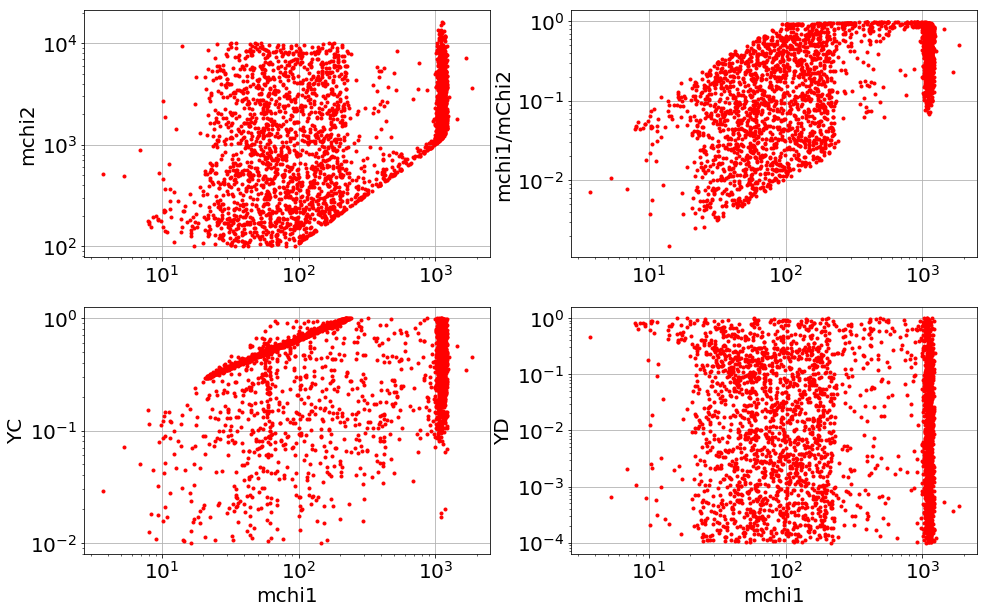

In [34]:
plt.figure(figsize=(16,10))

plt.subplot(221)
plt.loglog(xd.mChi1, xd.mChi2, 'r.')
plt.grid()
#plt.xlabel('mchi1')
plt.ylabel('mchi2')

plt.subplot(222)
plt.loglog(xd.mChi1, xd.mChi1/xd.mChi2, 'r.')
plt.grid()
#plt.xlabel('mchi1')
plt.ylabel('mchi1/mChi2')

plt.subplot(223)
plt.loglog(xd.mChi1, xd.YRC, 'r.')
plt.grid()
plt.xlabel('mchi1')
plt.ylabel('YC')

plt.subplot(224)
plt.loglog(xd.mChi1, xd.YRD, 'r.')
plt.grid()
plt.xlabel('mchi1')
plt.ylabel('YD')


plt.show()

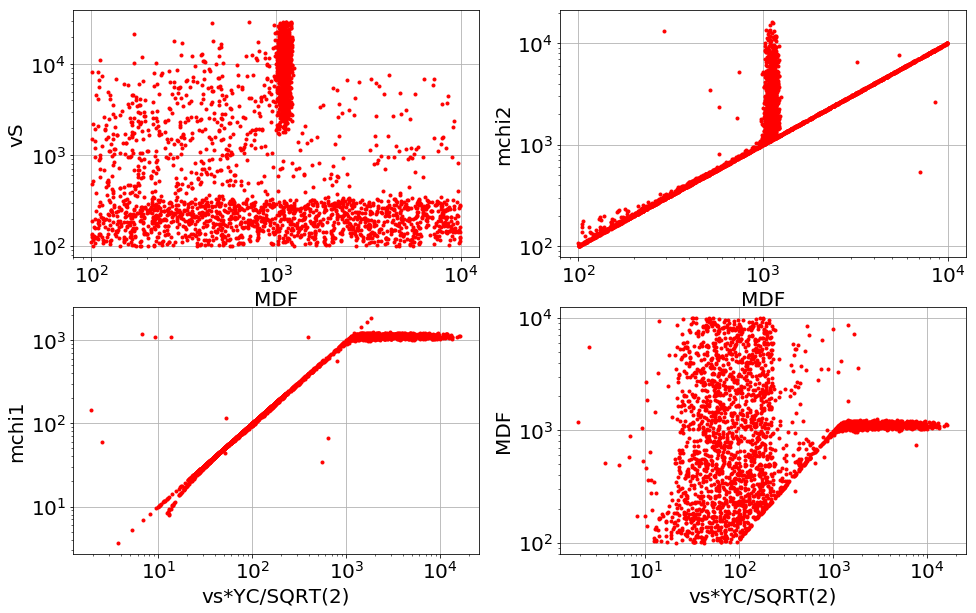

In [35]:
plt.figure(figsize=(16,10))

plt.subplot(221)
plt.loglog(xd.MDF, xd.vS, 'r.')
plt.grid()
plt.xlabel('MDF')
plt.ylabel('vS')

plt.subplot(222)
plt.loglog(xd.MDF, xd.mChi2, 'r.')
plt.grid()
plt.xlabel('MDF')
plt.ylabel('mchi2')

plt.subplot(223)
plt.loglog(xd.vS*xd.YRC/np.sqrt(2), xd.mChi1, 'r.')
plt.grid()
plt.xlabel('vs*YC/SQRT(2)')
plt.ylabel('mchi1')

plt.subplot(224)
plt.loglog(xd.vS*xd.YRC/np.sqrt(2), xd.MDF, 'r.')
plt.grid()
plt.xlabel('vs*YC/SQRT(2)')
plt.ylabel('MDF')

plt.show()

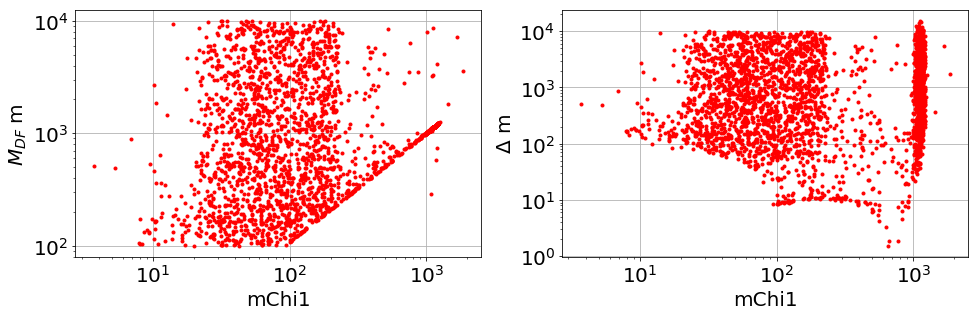

In [36]:
plt.figure(figsize=(16,10))

plt.subplot(221)
plt.loglog(xd.mChi1, xd.MDF, 'r.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'$M_{DF}$ m')

plt.subplot(222)
plt.loglog(xd.mChi1, xd.mChi2-xd.mChi1, 'r.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'$\Delta$ m')

plt.show()

The scan prefers $m_{\chi_1^0} < 2$ TeV

In [37]:
xd.mChi1.max()

1839.9373600000001

# Good points

In [56]:
## Better points
kk = xDM[np.logical_and(xDM.PSI<5e-11,xDM.NSI<5e-11)]

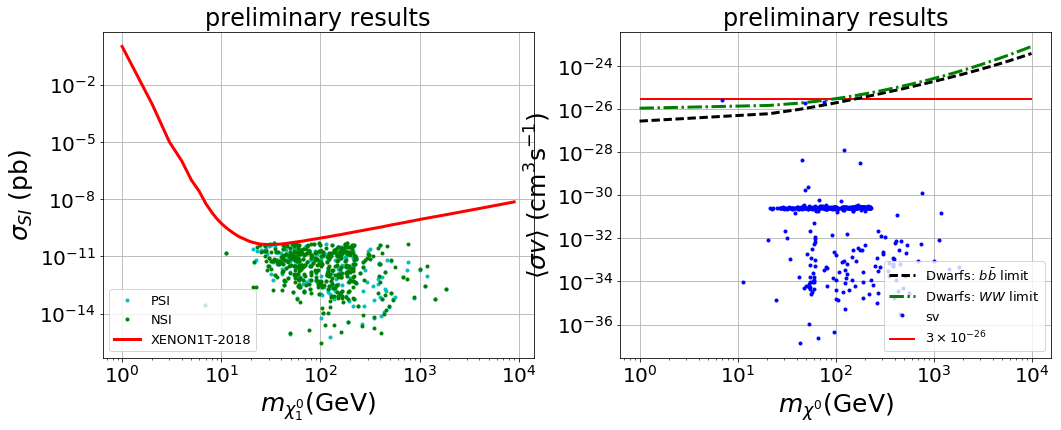

In [39]:
plt.figure(figsize=(17,6))

plt.subplot(121)
plt.loglog(kk.mChi1, kk.PSI, 'c.')
plt.loglog(kk.mChi1, kk.NSI, 'g.')
#plt.plot(xDM.mChi1, xDM.NSI, 'ro',label='GP')
#plt.plot(xDM.mChi1, xDM.PSI, 'ro',label='')

n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T-2018')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SI} $ (pb)',size=25)
plt.legend(prop={'size':13},loc='lower left')
plt.grid()
#plt.xlim(1e0,2e3)
plt.title('preliminary results')

plt.subplot(122)
plt.hlines(3e-26,1,1e4,'r',lw=2,label=r'$3\times 10^{-26}$')
##Plot xx-->> bb --> tt
m=np.linspace(1,10000,500)
plt.semilogy(m,sigmav_bb_fit(m),'k--',lw=3,label=r'Dwarfs: $b\bar{b}$ limit')
plt.semilogy(m,sigmav_ww_fit(m),'g-.',lw=3,label=r'Dwarfs: $WW$ limit')

plt.loglog(kk.mChi1, kk.sv , 'b.')
#plt.loglog(xDM.mChi1, xDM.sv , 'ro',label='GP')
#plt.loglog(xDM.mChi1, xDM.sv , 'ro',label='')

plt.legend(prop={'size':13},loc='lower right')
plt.grid()
plt.title('preliminary results')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\langle\sigma v\rangle $ $($cm$^{3} $s$^{-1})$',size=25)

#plt.ylim(1e-35,1e-24)

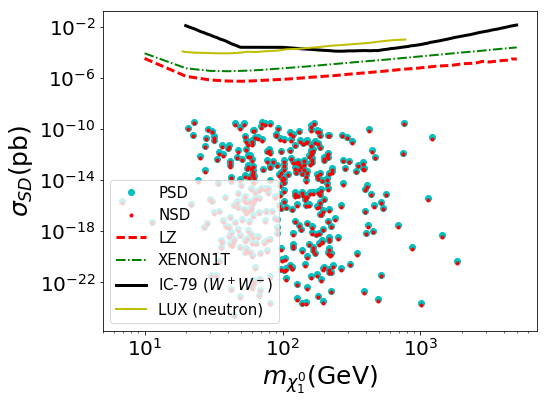

In [59]:
plt.figure(figsize=(8,6))

plt.loglog(kk.mChi1,kk['PSD'],'co')
plt.loglog(kk.mChi1,kk['NSD'],'r.')

#Prospects
n=np.arange(10,5000,10)
plt.loglog(n,LZ(n),'r--',lw=3,label='LZ')
plt.loglog(n,XENON1TSD(n),'g-.',lw=2,label='XENON1T')

#plt.plot(PICO2L_SD['M'],PICO2L_SD['sigmaSD']*(1E+36),'lime',lw=2,label='PICO-2L (proton)')
#plt.plot(PICO60_SD['M'],PICO60_SD['sigmaSD']*(1e+36),'y-',lw=2,label='PICO-60 (proton)')
#IceCube limit
plt.plot(10**IC_SD['M'],10**IC_SD['sigmaSD']*1e+36,'k-',lw=3,label=r'IC-79 ($W^+W^-$)')
#LUX
plt.plot(LUX_SD_n['M'],LUX_SD_n['sigmaSD']*(1e+36),'y',lw=2,label='LUX (neutron)')

#plt.title(r'Preliminary: Without LFV')
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\sigma_{SD}$(pb)',size=25)
plt.legend(prop={'size':15},loc='lower left')
#plt.xlim(20,3e3)
#plt.ylim(1e-23,1e-1)

plt.tight_layout()
#plt.savefig('plots/sigmaSD_with_neutrino_physics.pdf')

Ok. SD don not import in the model

improving the scan. The general points -> filter

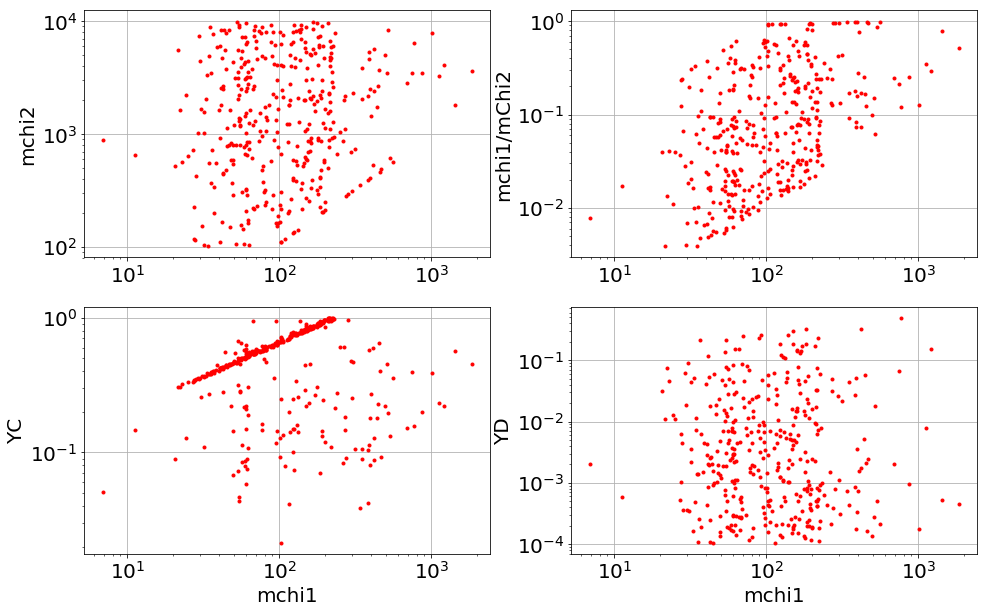

In [40]:
plt.figure(figsize=(16,10))

plt.subplot(221)
plt.loglog(kk.mChi1, kk.mChi2, 'r.')
plt.grid()
#plt.xlabel('mchi1')
plt.ylabel('mchi2')

plt.subplot(222)
plt.loglog(kk.mChi1, kk.mChi1/kk.mChi2, 'r.')
plt.grid()
#plt.xlabel('mchi1')
plt.ylabel('mchi1/mChi2')

plt.subplot(223)
plt.loglog(kk.mChi1, kk.YRC, 'r.')
plt.grid()
plt.xlabel('mchi1')
plt.ylabel('YC')

plt.subplot(224)
plt.loglog(kk.mChi1, kk.YRD, 'r.')
plt.grid()
plt.xlabel('mchi1')
plt.ylabel('YD')


plt.show()

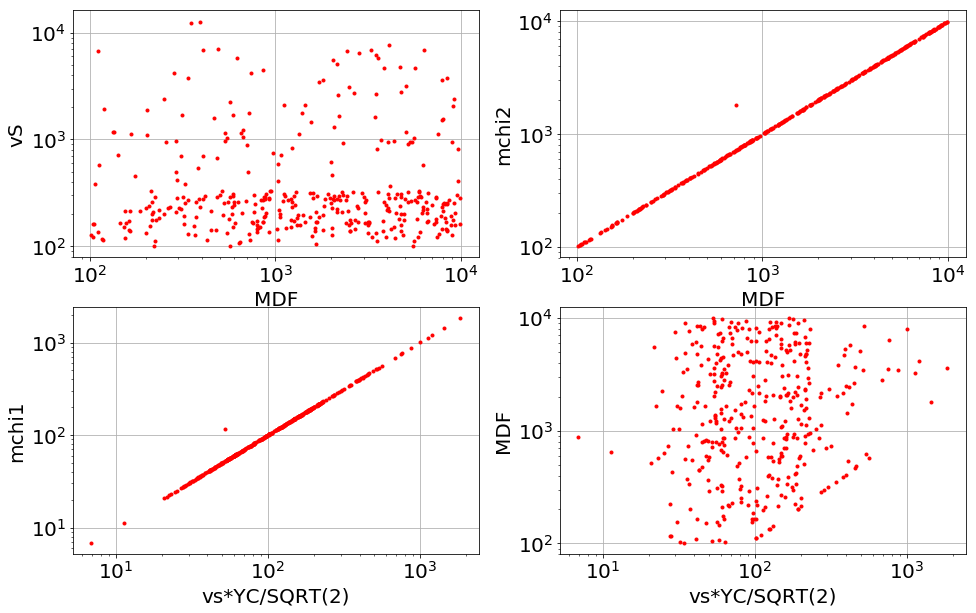

In [41]:
plt.figure(figsize=(16,10))

plt.subplot(221)
plt.loglog(kk.MDF, kk.vS, 'r.')
plt.grid()
plt.xlabel('MDF')
plt.ylabel('vS')

plt.subplot(222)
plt.loglog(kk.MDF, kk.mChi2, 'r.')
plt.grid()
plt.xlabel('MDF')
plt.ylabel('mchi2')

plt.subplot(223)
plt.loglog(kk.vS*kk.YRC/np.sqrt(2), kk.mChi1, 'r.')
plt.grid()
plt.xlabel('vs*YC/SQRT(2)')
plt.ylabel('mchi1')

plt.subplot(224)
plt.loglog(kk.vS*kk.YRC/np.sqrt(2), kk.MDF, 'r.')
plt.grid()
plt.xlabel('vs*YC/SQRT(2)')
plt.ylabel('MDF')

plt.show()

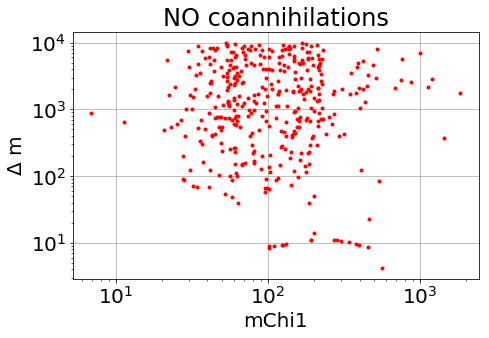

In [42]:
plt.figure(figsize=(16,10))

plt.subplot(221)
plt.loglog(kk.mChi1, kk.mChi2-kk.mChi1, 'r.')
plt.grid()
plt.title('NO coannihilations')
plt.xlabel('mChi1')
plt.ylabel(r'$\Delta$ m')

plt.show()

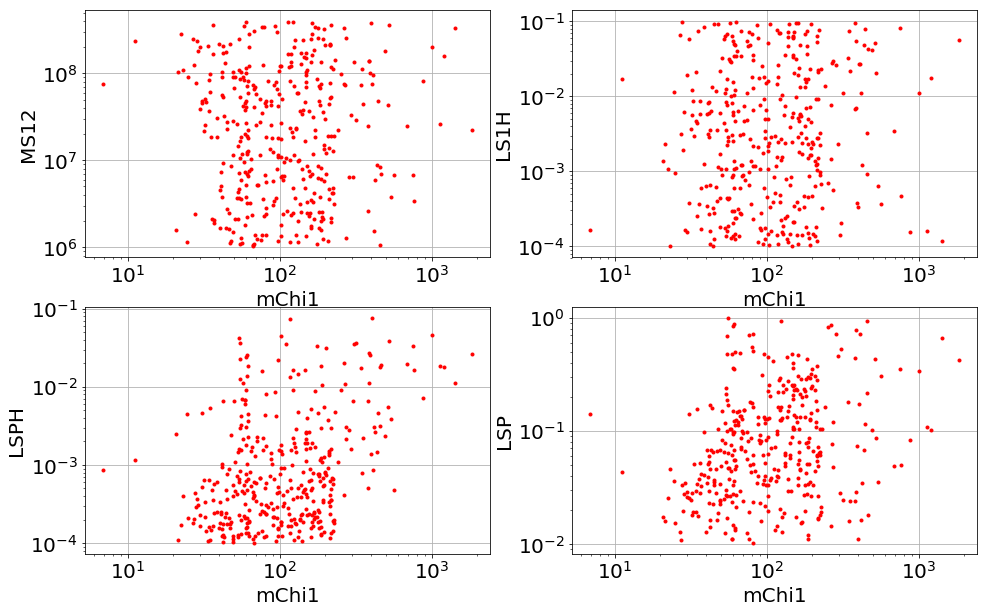

In [43]:
plt.figure(figsize=(16,10))

plt.subplot(221)
plt.loglog(kk.mChi1, kk.MS12, 'r.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'MS12')

plt.subplot(222)
plt.loglog(kk.mChi1, kk.LamS1H, 'r.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'LS1H')

plt.subplot(223)
plt.loglog(kk.mChi1, kk.LamSPH, 'r.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'LSPH')

plt.subplot(224)
plt.loglog(kk.mChi1, kk.LamSP, 'r.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'LSP')

plt.show()

# $Ya_{si}$ -> Random

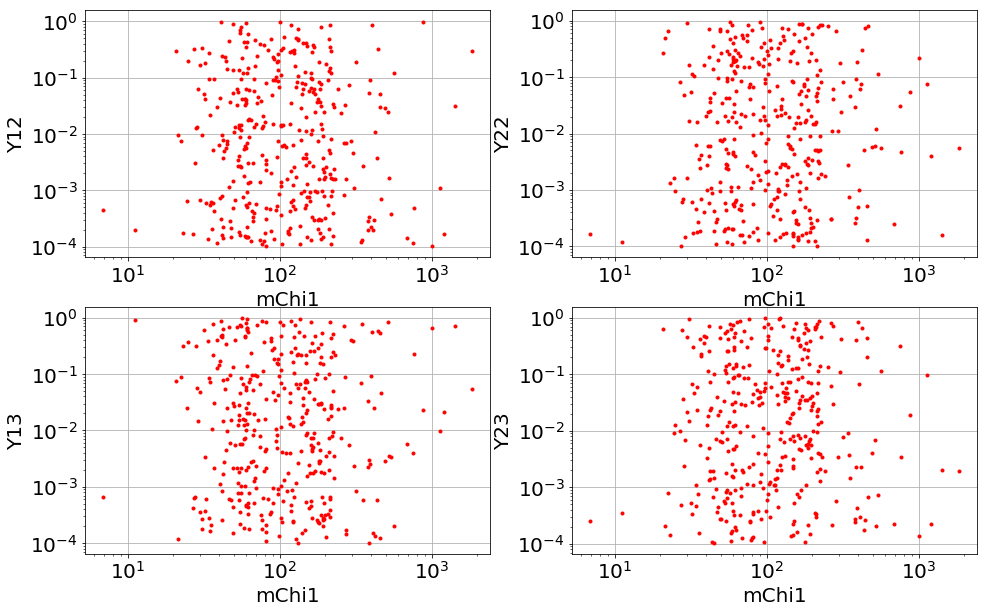

In [44]:
plt.figure(figsize=(16,10))

plt.subplot(221)
plt.loglog(kk.mChi1, kk.YRA12, 'r.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'Y12')

plt.subplot(222)
plt.loglog(kk.mChi1, kk.YRA22, 'r.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'Y22')

plt.subplot(223)
plt.loglog(kk.mChi1, kk.YRA13, 'r.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'Y13')

plt.subplot(224)
plt.loglog(kk.mChi1, kk.YRA23, 'r.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'Y23')

plt.show()

# $Yb_{si}$

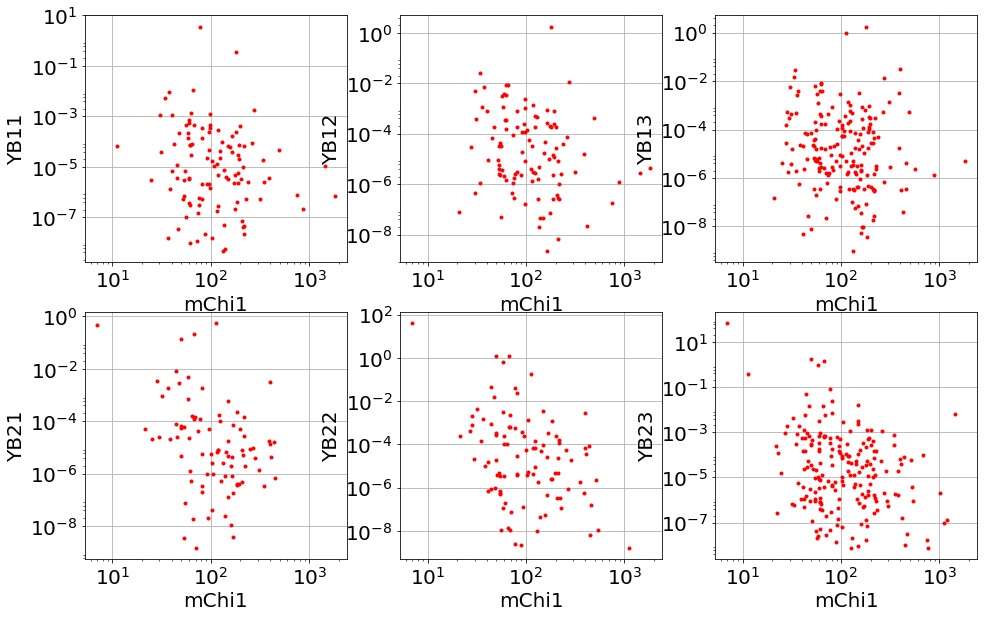

In [45]:
plt.figure(figsize=(16,10))

plt.subplot(231)
plt.loglog(kk.mChi1, kk.YRB11, 'r.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'YB11')

plt.subplot(232)
plt.loglog(kk.mChi1, kk.YRB12, 'r.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'YB12')

plt.subplot(233)
plt.loglog(kk.mChi1, kk.YRB13, 'r.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'YB13')

plt.subplot(234)
plt.loglog(kk.mChi1, kk.YRB21, 'r.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'YB21')

plt.subplot(235)
plt.loglog(kk.mChi1, kk.YRB22, 'r.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'YB22')

plt.subplot(236)
plt.loglog(kk.mChi1, kk.YRB23, 'r.')
plt.grid()
plt.xlabel('mChi1')
plt.ylabel(r'YB23')

plt.show()

In [47]:
kk[['XV11', 'XV12', 'XV21', 'XV22', 'XU11', 'XU12', 'XU21', 'XU22', 'PSD', 'NSD', 'T', 'S', 'U', 'taumug',
       'ZH11', 'ZH12', 'ZH21', 'ZH22', 'BRh1gg', 'BRh2gg']][:3]

,XV11,XV12,XV21,XV22,XU11,XU12,XU21,XU22,PSD,NSD,T,S,U,taumug,ZH11,ZH12,ZH21,ZH22,BRh1gg,BRh2gg
1,6.522896e-05,-1.0,1.0,6.522896e-05,0.001721,-0.999999,0.999999,0.001721,8.859000e-14,6.774000e-14,0.047818,0.101726,-0.002513,1.791040e-18,0.001084,-0.999999,-0.999999,-0.001084,0.000342,0.002816
15,3.023225e-06,-1.0,1.0,3.023225e-06,0.000039,-1.000000,1.000000,0.000039,2.355000e-20,1.801000e-20,0.047945,0.102280,-0.002380,1.291282e-20,0.001647,-0.999999,-0.999999,-0.001647,0.000340,0.002827
23,1.309985e-07,-1.0,1.0,1.309985e-07,0.000005,-1.000000,1.000000,0.000005,5.440000e-24,4.159000e-24,0.024946,0.037480,-0.001396,1.260597e-19,0.010182,-0.999948,-0.999948,-0.010182,0.001389,0.002818
